# Analysis on USA.gov Data from Bitly


LOADING THE JSON FILE

In [75]:
path=(r"C:\Users\USER\Desktop\victor\pydata-book-3rd-edition\datasets\bitly_usagov\example.txt")
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [76]:
import json

In [77]:
record=[json.loads(line) for line in open(path)]

In [103]:
record[:10]

[{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
  'c': 'US',
  'nk': 1,
  'tz': 'America/New_York',
  'gr': 'MA',
  'g': 'A6qOVH',
  'h': 'wfLQtf',
  'l': 'orofrog',
  'al': 'en-US,en;q=0.8',
  'hh': '1.usa.gov',
  'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
  'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
  't': 1331923247,
  'hc': 1331822918,
  'cy': 'Danvers',
  'll': [42.576698, -70.954903]},
 {'a': 'GoogleMaps/RochesterNY',
  'c': 'US',
  'nk': 0,
  'tz': 'America/Denver',
  'gr': 'UT',
  'g': 'mwszkS',
  'h': 'mwszkS',
  'l': 'bitly',
  'hh': 'j.mp',
  'r': 'http://www.AwareMap.com/',
  'u': 'http://www.monroecounty.gov/etc/911/rss.php',
  't': 1331923249,
  'hc': 1308262393,
  'cy': 'Provo',
  'll': [40.218102, -111.613297]},
 {'a': 'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0

COUNTING THE TIMEZONE 

In [79]:
time_zones=[rec["tz"] for rec in record if "tz" in rec]

In [80]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [81]:
def get_counts(sequence):
    counts={}
    for x in sequence:
        if x in counts:
            counts[x]+=1
        else:
            counts[x]=1
    return counts

In [82]:
counts=get_counts(time_zones)
counts['America/New_York']


1251

In [83]:
len(time_zones)

3440

LOADING THE FILE INTO PANDAS

In [84]:
import pandas as pd
frame=pd.DataFrame(record)

In [85]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [86]:
frame.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


In [87]:
tz_counts=frame["tz"].value_counts() #COUNTING THE TIMEZONES

In [88]:
tz_counts

America/New_York        1251
                         521
America/Chicago          400
America/Los_Angeles      382
America/Denver           191
                        ... 
Europe/Uzhgorod            1
Australia/Queensland       1
Europe/Sofia               1
America/Costa_Rica         1
America/Tegucigalpa        1
Name: tz, Length: 97, dtype: int64

DATA CLEANING

In [89]:
#CLEANING THE TIMEZONES
clean_tz=frame["tz"].fillna("missing")
clean_tz[clean_tz == ''] = 'Unknown'

In [90]:
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [91]:
#IMPORTING THE VISUALIZATION MODULE 
import seaborn as sns

<AxesSubplot:>

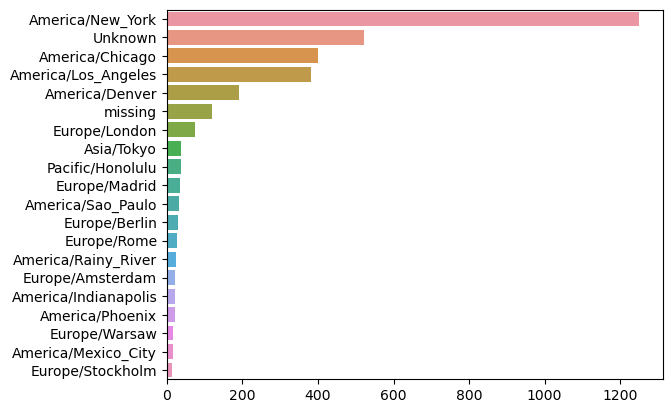

In [92]:
#VISUALIZING TIMEZONE COUNTS
subset=tz_counts[:20]
sns.barplot(y=subset.index, x=subset.values)

In [93]:
#The a field contains information about the browser, device, or application used to
#perform the URL shortening

In [94]:
frame["a"][:50]

0     Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                                GoogleMaps/RochesterNY
2     Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3     Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4     Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
5     Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
6     Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...
7     Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...
8     Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...
9     Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
10    Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2)...
11    Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10.4...
12    Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2)...
13                                                  NaN
14    Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...
15    Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.1...
16    Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.1...
17    Mozilla/5.0 (Macintosh; Intel Mac OS X 10.

In [95]:
 #splitting off the first token in the string 
results = pd.Series([x.split()[0] for x in frame.a.dropna()])

In [96]:
results.value_counts()

Mozilla/5.0                                          2594
Mozilla/4.0                                           601
GoogleMaps/RochesterNY                                121
Opera/9.80                                             34
TEST_INTERNET_AGENT                                    24
GoogleProducer                                         21
Mozilla/6.0                                             5
BlackBerry8520/5.0.0.681                                4
BlackBerry8520/5.0.0.592                                3
Dalvik/1.4.0                                            3
Goldfire                                                2
Acoon                                                   2
Socialite/7766                                          2
BlackBerry9630/5.0.0.975                                2
sometrik.com                                            1
Vodafone/1.0/LG-KU990i/V10c                             1
BlackBerry8530/5.0.0.654                                1
Vancouver     

DECOMPOSING THE TOP TIMEZONES INTO WINDOWS AND NON-WINDOW USERS 

In [97]:
# Determined user is on Windows if the string 'Windows' is in the agent string
cframe = frame[frame.a.notnull()]
import numpy as np
cframe['os'] = np.where(cframe['a'].str.contains('Windows'),'Windows', 'Not Windows')
cframe['os'][:5]

C:\Users\USER\AppData\Local\Temp\ipykernel_4336\2310209606.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cframe['os'] = np.where(cframe['a'].str.contains('Windows'),'Windows', 'Not Windows')


0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [98]:
#grouping the data by the timezone column and it operating system
by_tz_os = cframe.groupby(['tz', 'os'])
#aggregate counting
agg_counts = by_tz_os.size().unstack().fillna(0) #filling null with 0
agg_counts[:10]

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [99]:
# Use to sort in ascending order
indexer = agg_counts.sum(1).argsort()
indexer[:20]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
America/Bogota                    62
America/Caracas                   34
America/Chicago                   60
America/Chihuahua                 36
America/Costa_Rica                37
America/Denver                    27
America/Edmonton                  76
America/Guayaquil                 56
America/Halifax                   89
America/Indianapolis               2
dtype: int64

In [100]:
#I use take to select the rows in that order, then slice off the last 10 rows (largest values
count_subset = agg_counts.take(indexer[-10:])
count_subset


os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


<AxesSubplot:xlabel='total', ylabel='tz'>

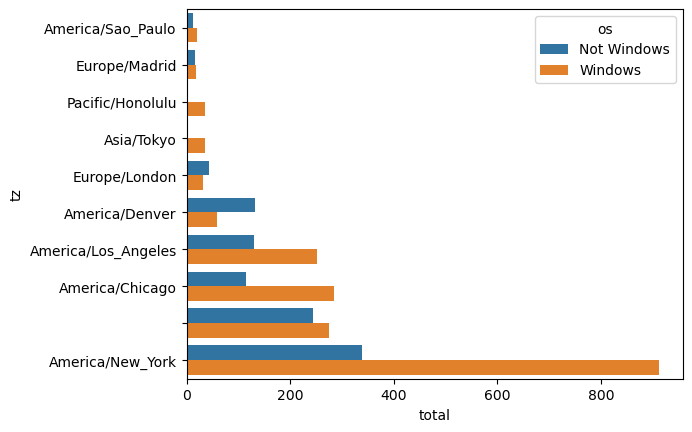

In [101]:
# Rearrange the data for plotting
count_subset = count_subset.stack()
count_subset.name = 'total'
count_subset = count_subset.reset_index()
sns.barplot(x='total', y='tz', hue='os', data=count_subset)
#Top time zones by Windows and non-Windows users

In [ ]:
#The plot doesn’t make it easy to see the relative percentage of Windows users in the
#smaller groups, so let’s normalize the group percentages to sum to 1

<AxesSubplot:xlabel='normed_total', ylabel='tz'>

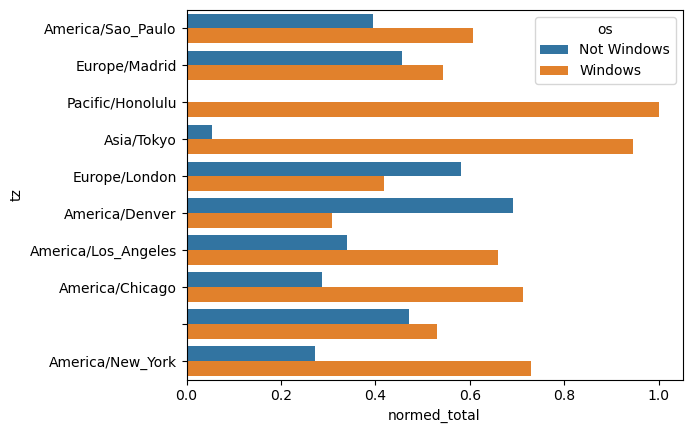

In [102]:
def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group
results = count_subset.groupby('tz').apply(norm_total)
sns.barplot(x='normed_total', y='tz', hue='os', data=results)